# Gambler's Problem

This is Example 4.3 from Sutton and Barto's book: http://people.inf.elte.hu/lorincz/Files/RL_2006/SuttonBook.pdf .

## Problem Setting 

A gambler can make bets on a coin flip. If the coin flip turns out to be a head, the gambler wins as many dollars as he has staked on that flip. If the coin flip is a tail, the gambler loses his stake. If the gambler reaches $100, it wins the game and gets the reward of +1. Otherwise, the reward is always 0.

## Solution

Let us find the optimal strategy using value iteration.

In [1]:
# imports
import math
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# problem definitions
goal = 100
prob_head = 0.4

In [3]:
# possible states are 1, 2, 3, ..., 99.
states = list(range(1, goal))
# current estimate of value function; by default, values are zero
values = defaultdict(float)
# remember a policy as a map from a state to an action
policy = {}
def value_iter(values, policy):
    for state in states:
        best_action = -1
        best_value = float("-inf")
        # action is the possible stake the gambler can bet
        for action in range(0, min(state, goal - state) + 1):
            new_value = (prob_head * ((1 if (state + action >= 100) else 0) + values[state + action])
                         + (1 - prob_head) * values[state - action])
            if new_value >= best_value:
                best_action = action
                best_value = new_value
        assert best_action >= 0
        policy[state] = best_action
        values[state] = best_value

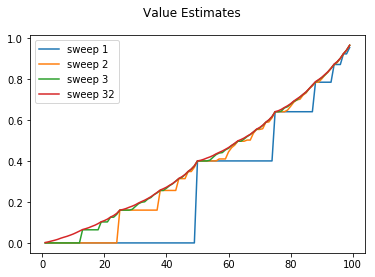

In [4]:
# Top plot of Figure 4.6
plot_iters = {1, 2, 3, 32}
for iter_num in range(1, 100):
    value_iter(values, policy)
    if iter_num in plot_iters:
        plt.plot(states, [values[state] for state in states], label="sweep {:d}".format(iter_num))
plt.legend()
plt.suptitle("Value Estimates")

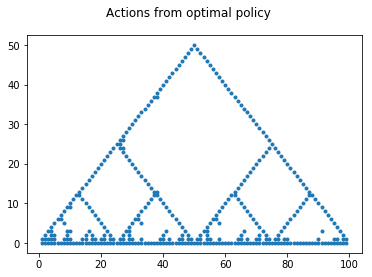

In [5]:
# compute possible actions from optimal policy, similar to the bottom plot in Figure 4.6
# allow for some numerical error in finding the best set of actions
tolerance = 0.001
xs = []
ys = []
for state in states:
    best_actions = {}
    best_value = float("-inf")
    # action is the possible stake the gambler can bet
    for action in range(0, min(state, goal - state) + 1):
        new_value = (prob_head * ((1 if (state + action >= 100) else 0) + values[state + action])
                     + (1 - prob_head) * values[state - action])
        if new_value > best_value + tolerance:
            best_actions = {action}
            best_value = new_value
        elif new_value >= best_value - tolerance:
            best_actions.add(action)
    for best_action in best_actions:
        xs.append(state)
        ys.append(best_action)
plt.scatter(xs, ys, marker='.')
plt.suptitle("Actions from optimal policy")